## Semestrální práce ZSUR

Import vlastních funkcí

In [1]:
# map google drive
from google.colab import drive
mypath = '/content/drive/MyDrive/Colab Notebooks/ZSUR_SP'
drive.mount('/content/drive')
 
%cd $mypath
!ls

%load_ext autoreload
%autoreload 2 # reload modulů při každém spuštění (aby nepracoval se starými moduly z cache)

# import vlastních funkcí k úlohám
from cast1a import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/ZSUR_SP
 cast1a.py   data.txt   __pycache__  'Semestrální práce ZSUR.ipynb'


### Načtení a zobrazení dat

[[ 1.100177  -3.067481 ]
 [ 0.6889062 -2.785743 ]
 [ 0.2491251 -3.105102 ]
 ...
 [-7.060973   3.271524 ]
 [-1.695408  -3.114714 ]
 [ 0.7562193 -2.917731 ]]
(6338, 2)


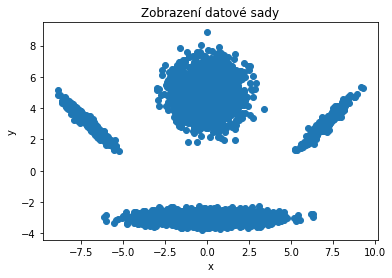

In [2]:
  # Načtení dat
  X = load('data.txt')
  print(X)
  print(X.shape)

  # Zobrazení dat
  plt.scatter(X[:, 0], X[:, 1])
  plt.title("Zobrazení datové sady")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

# Část 1 - automaticky určit počet tříd

## a) metodou **shlukové hladiny** (automaticky nalezněte hladinu h)  

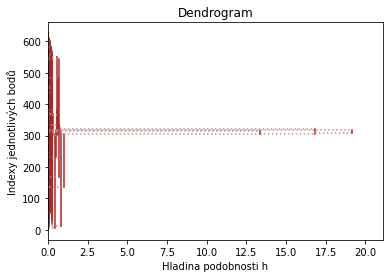

cas behu:  12.094268321990967 s


In [4]:
# Náhodný výběr části dat
indexes = np.random.choice(X.shape[0], replace=False, size=630)
Vyber = X[indexes, :].copy()

# Použití metody shlukové hladiny na zmenšeném výběru
# metrika podobnosti: Kvadrát eukleidovské vzdálenosti 
start = time.time()
T, h, dendroplot, labels = shlukova_hladina(Vyber)
print('cas behu: ', time.time() - start, 's')

ideální počet tříd: 4 
největší rozdíl v podobnostech shluků: 12.305294896600003


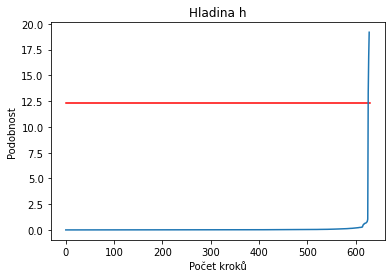

In [9]:
# Automatické nalezení idealního počtu tříd
pocet_trid, h_diff = najdi_h_diff(h)
# Zobrazeni hladiny podobnosti
plt.figure()
print('ideální počet tříd:', pocet_trid, '\nnejvětší skok v podobnostech shluků:', h_diff)
plt.plot([0, len(h)], [h_diff, h_diff], 'red')
plt.plot(h[1:])
plt.title('Hladina h')
plt.xlabel('Počet kroků')
plt.ylabel('Podobnost')
plt.show()

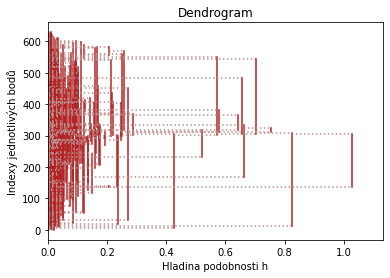

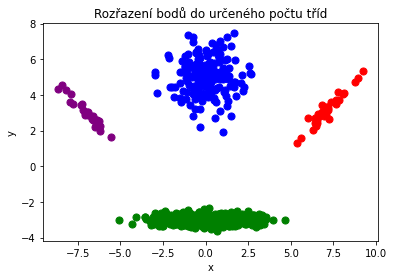

In [12]:
# Rozřazení bodů do určeného počtu tříd
Ti, h, dendroplot, labels = shlukova_hladina(Vyber, pocet_shluku=pocet_trid)
plt.figure()
plt.scatter(Vyber[labels == 0, 0], Vyber[labels == 0, 1], s=50, marker='o', color='red')
plt.scatter(Vyber[labels == 1, 0], Vyber[labels == 1, 1], s=50, marker='o', color='blue')
plt.scatter(Vyber[labels == 2, 0], Vyber[labels == 2, 1], s=50, marker='o', color='green')
plt.scatter(Vyber[labels == 3, 0], Vyber[labels == 3, 1], s=50, marker='o', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rozřazení bodů do určeného počtu tříd')
plt.show()

## b) metodou **rětězové mapy** (zkuste několik různých počátků)

## c) metodou **MAXIMIN**

### Vzájemné porovnání metod